### 좀 더 편리한 시각화 도구 : Seaborn
- matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구
- seaborn 라이브러리를 설치해야 하지만 (!pip install seaborn)
- 아나콘다 배포반을 사용하는 경우 기본으로 설치되기 때문에 추가 설치 필요 없음
- seaborn을 사용할 때 matplotlib도 같이 import 되어 있어야 함
- 스타일 색상을 지원하기위해서 파렛트를 지원
- 그래프는 대부분 matplotlib에 있는 그래프를 사용하고, 
- seaborn에  몇 가지 그래프가 더 추가되어 있음

#### 그래프 유형
- plot()
- histplot() 
- kdeplot()
- boxplot()
- swarmplot()
- lmplot()
- heatmap()

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
# 패키지 버전 변경하기 전에 버전 확인
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
import matplotlib
print(matplotlib.__version__)
import folium
print(folium.__version__)

2.0.0
1.24.3
0.12.2
3.7.3
0.14.0


#### 패키지 버전 변경 : Anaconda Prompt에서 할 것
pip install --upgrade pandas==2.0.0  
pip install --upgrade matplotlib==3.7.3  
pip install --upgrade seaborn==0.12.2  
pip install --upgrade folium==0.14.0  

### plot() 

In [6]:
# 사용할 데이터 
x = np.linspace(0, 14, 100) #0부터 14까지의 범위에서 동일 간격의 숫자 100개 생성
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

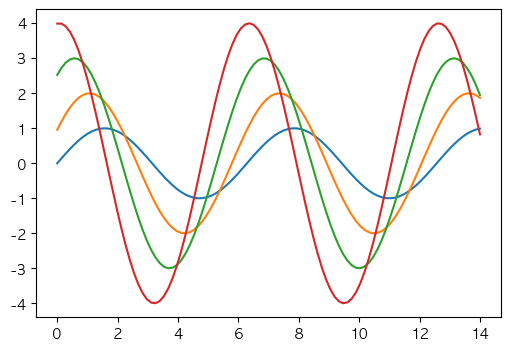

In [7]:
# plot() 예 : 4개의 sin 곡선
plt.figure(figsize=(6,4))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

#### seaborn 스타일링 함수

1. set_style() : 그림의 전반적인 모양 스타일링  
    - background color, grid, spine, tick 등 설정   
    - Built-in Themes (내장 테마) 활용  
    -  5가지 기본 제공 테마 : darkgrid, whitegrid, dark, white, ticks.   
        - 기본값은 darkgrid, 원하는대로 변경 가능  
2. despine() 함수
    - 축선 표시 여부 결정 (right=T/F,left=T/F,top=T/F,bottom=T/F)  
        - 각 속성값에 따라 표시 설정   
            - True  : 표시 안 함  
            - False : 표시  
3. set_context() 함수   
    - 프리젠테이션이나 보고서와 같은 다양한 매체에 활용할 수 있도록 스타일링  
    - 전체 스케일 조정 : paper, notebook, talk, poster(기본값 : notebook)  
    - 스케일로도 전반적인 사이즈를 조정가능하지만, 폰트 크기 조정 파라미터 별도 사용 가능  
    - sns.set_context() 함수의 font_scale 파마미터 사용  

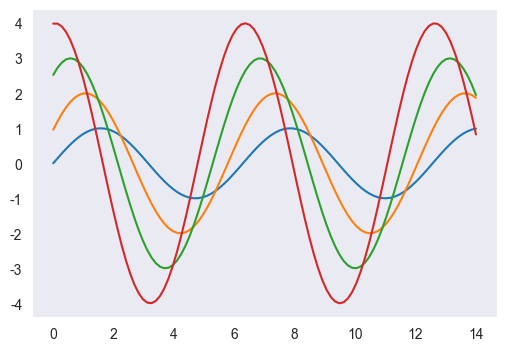

In [8]:
# 스타일 설정 : 배경 설정 
# set_style() : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('dark')
plt.figure(figsize=(6,4))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

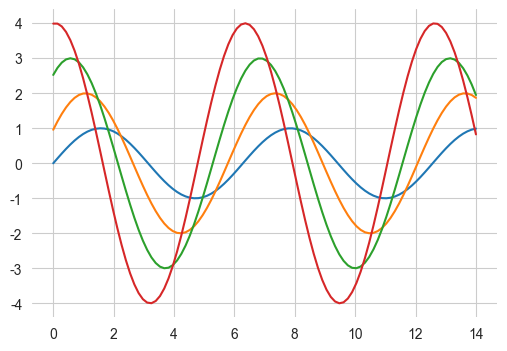

In [9]:
# 스타일 설정 : 축선 표시 despine()
# (right=T/F,left=T/F,top=T/F,bottom=T/F)
# True : 표시
# False : 표시 안 함
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
plt.plot(x,y1, x,y2, x,y3, x,y4)

sns.despine(left=True, bottom=True)
plt.show()


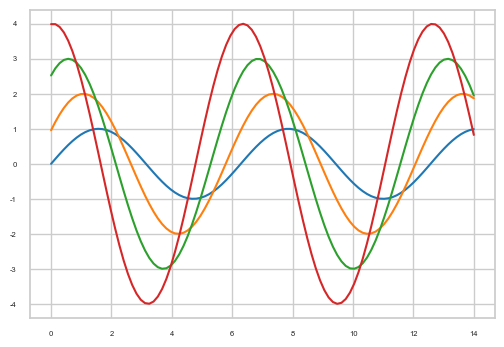

In [10]:
# style 설정 : set_context()
# paper, notebook, talk, poster
sns.set_context('notebook', font_scale=0.5) # style 설정 : font_scale
plt.figure(figsize=(6,4))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

##############################################################

In [11]:
titanic = sns.load_dataset('titanic') 
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

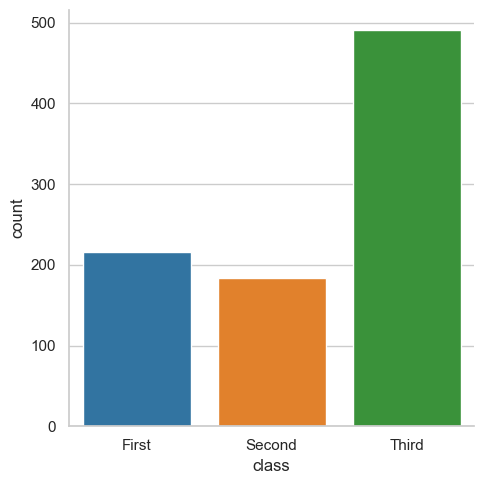

In [13]:
# 범주형 변수(카테고리별) 시각화 그래프 : catplot()
sns.set_context('notebook', font_scale=1)
sns.catplot(x='class', kind='count', data=titanic)
plt.show()

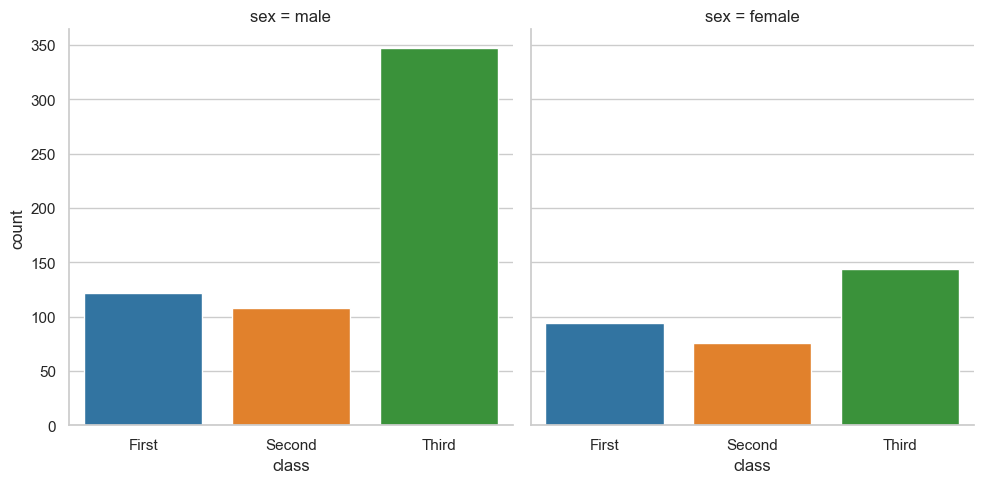

In [14]:
# row, col : 해당 카테고리별로 또 나누어서 행, 열방향으로 그래프들을 나열한다
sns.catplot(x='class', col='sex', kind='count', data=titanic)
plt.show()

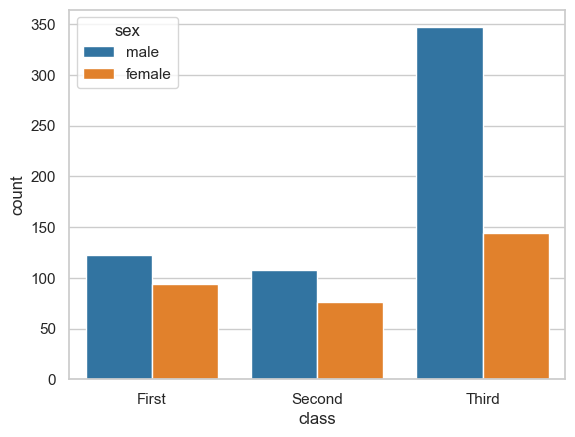

In [15]:
# countplot()
sns.countplot(x='class', hue='sex', data=titanic)
plt.show()

In [16]:
tips = sns.load_dataset('tips') 
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


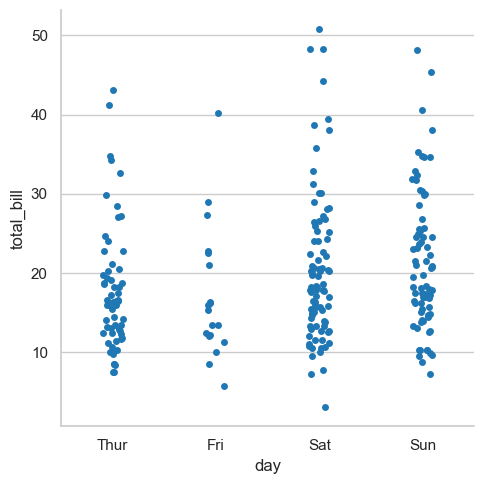

In [17]:
# catplot(x, y, *args)
# x : 범주형 변수, y : 시각화할 값
sns.catplot(x='day', y='total_bill', data=tips)
plt.show()

###  Distribution Plot
- Distribution Plot은 데이터의 분포를 시각화하는데 도움이 되는 그래프
    - 1. Hist Plot : histplot()  
    - 2. KDE Plot : kdeplot()  
    - 3. Box Plot : boxplot()  
    - 4. Swarm Plot : swarmplot()

#### 1. Hist Plot
- 변수에 대한 히스토그램 표시
- 하나 또는 두 개의 변수 분포를 나타내는 전형적인 시각화 도구로 
- 범위에 포함되는 관측수를 세어 표시

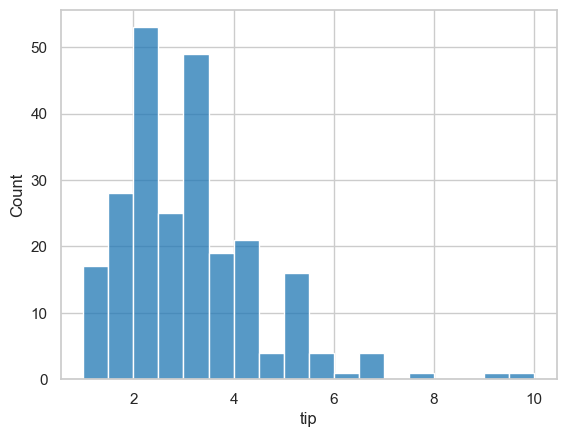

In [18]:
sns.histplot(x=tips['tip'])
plt.show()

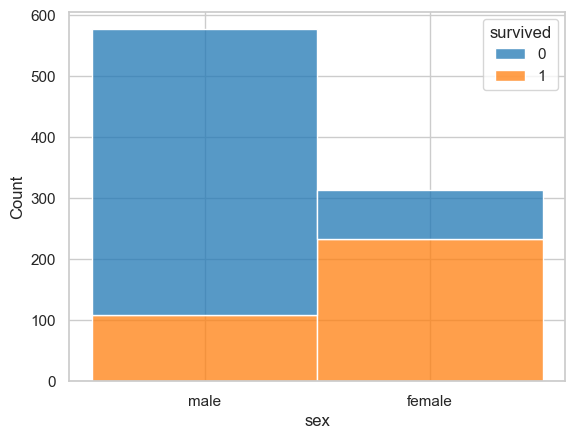

In [19]:
# 누적 그래프 : multiple
sns.histplot(x='sex', hue='survived', multiple='stack', data=titanic)
plt.show()

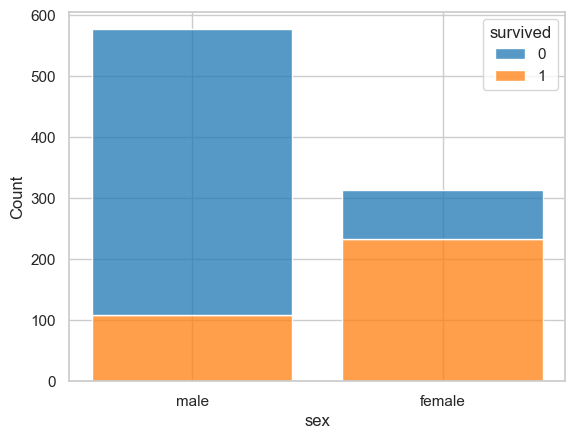

In [20]:
# shrink로 띄우기
sns.histplot(x='sex', hue='survived', multiple='stack', shrink=0.8, data=titanic)
plt.show()

2. KDE Plot
- Kernel Density Estimation (커널 밀도 추정) 
- 하나 또는 두 개의 변수에 대한 분포를 나타내는 그래프
- histplot은 절대량이라면 kdeplot은 밀도 추정치를 시각화
    - 연속된 곡선의 그래프로 출력

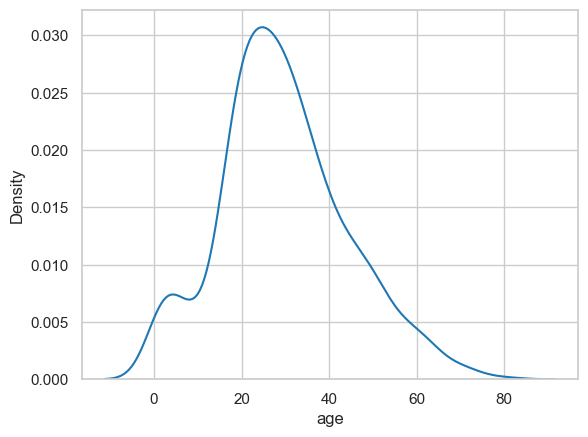

In [21]:
sns.kdeplot(x=titanic['age'])
plt.show()

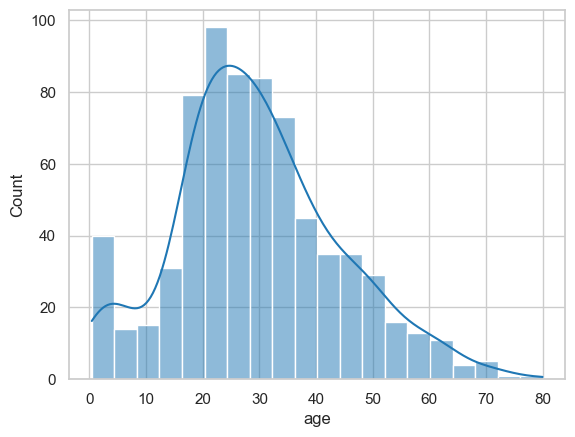

In [22]:
# histplot, kdeplot동시에 그리기 가능
sns.histplot(x=titanic['age'], kde=True)
plt.show()

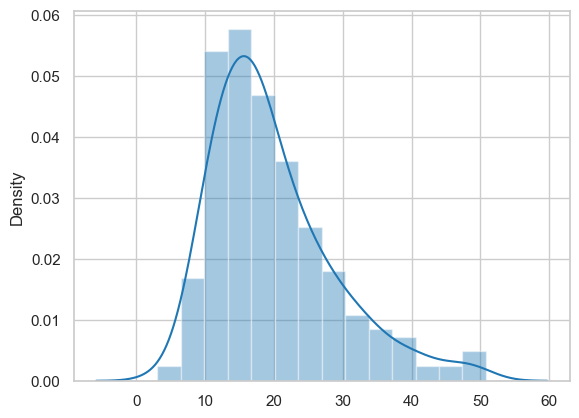

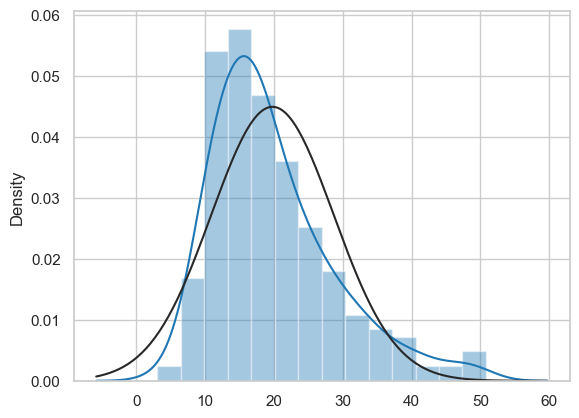

In [23]:
sns.distplot(x=tips['total_bill'])
plt.show()

from scipy import stats
sns.distplot(x=tips['total_bill'], fit=stats.norm)
plt.show()

#### 3. Box Plot
- 박스 플롯 (Box plot) : 전체 데이터로부터 얻어진 통계량 5가지 요약 수치로 그래프 생성  
    - 최소값 : 0% 지점  
    - 제 1사분위 수 (Q1 : 25% 지점)  
    - 제 2사분위 수 또는 중위수 (Q2 : 50% 지점)  
    - 제 3사분위 수 (Q3 : 75% 지점)  
    - 최대값 : 100% 지점   
- 최대, 최소, mean(평균), 사분위수를 보기 위한 그래프  
- 특이치(outliar)를 발견하기 좋음  
- 단일 연속형 변수에 대해 수치를 표시하거나,   
- 연속형 변수를 기반으로 서로 다른 범주형 변수를 분석할 수 있음  

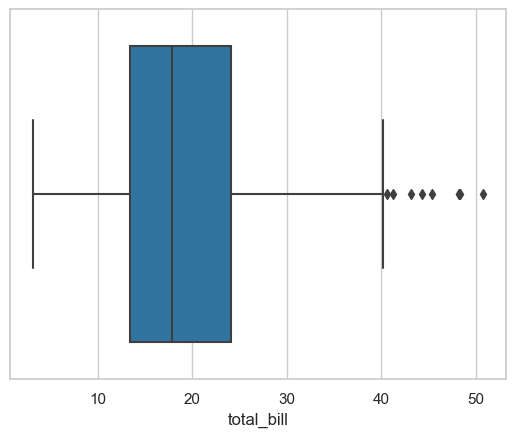

In [24]:
sns.boxplot(x=tips['total_bill'])
plt.show()

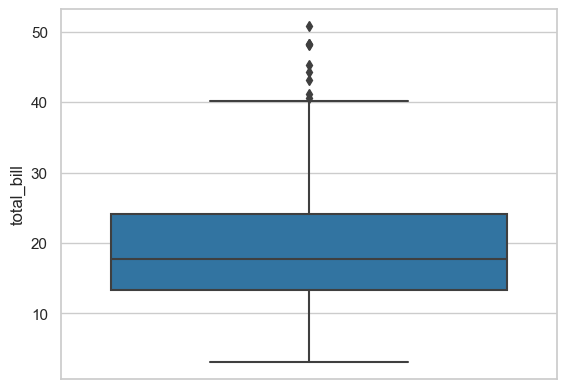

In [25]:
sns.boxplot(y=tips['total_bill']) # y로 하면 y방향으로 나옴
plt.show()

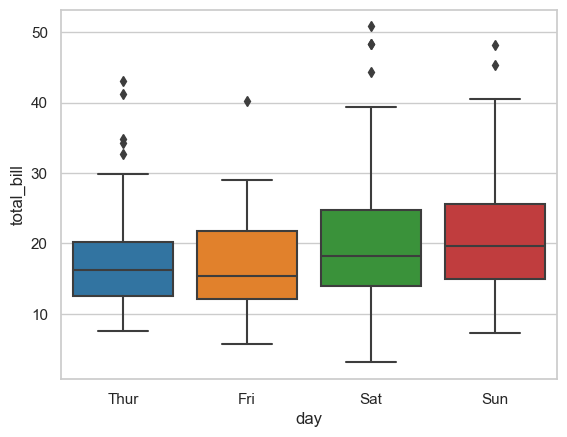

In [26]:
sns.boxplot(x=tips['day'], y=tips['total_bill'])
plt.show()

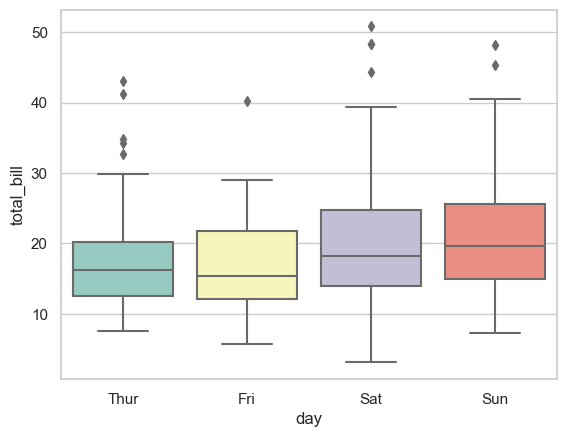

In [27]:
sns.boxplot(x=tips['day'], y=tips['total_bill'], palette='Set3') # 색 바꾸기
# palette : Set1, Set2, RdBu, ...
plt.show()

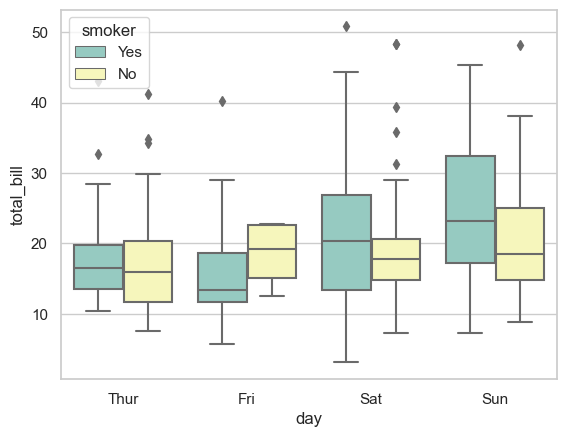

In [28]:
# hue : 여러 변수를 한 카테고리에서 분류
sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker', palette='Set3')
plt.show()

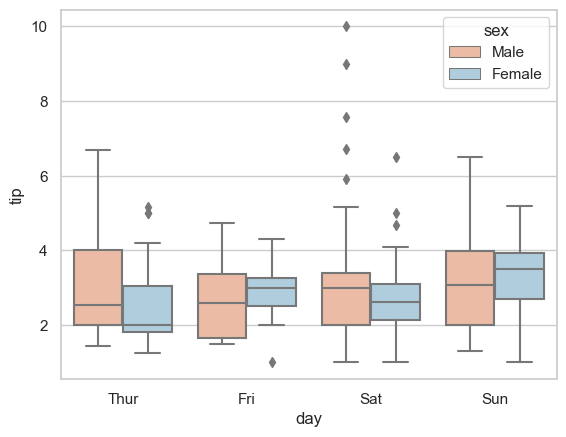

In [29]:
sns.boxplot(data=tips, x='day', y='tip', hue='sex', palette='RdBu')
plt.show()

#### 4. Swarm Plot : swarmplot()
- 데이터 포인트 수와 함께 각 데이터의 분포 표시
- 데이터가 모여 있는 정도를 확인하기 좋음

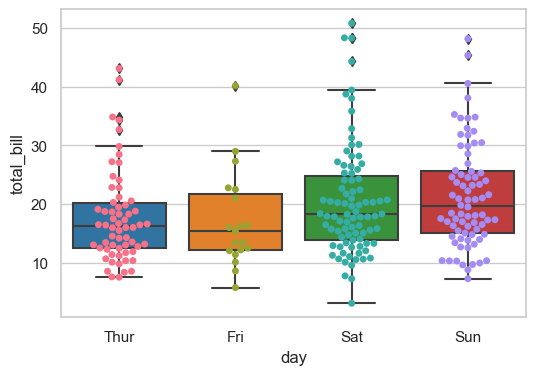

In [30]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=tips, x='day', y='total_bill')
sns.swarmplot(data=tips, x='day', y='total_bill', palette='husl')
plt.show()

<Axes: xlabel='day', ylabel='total_bill'>

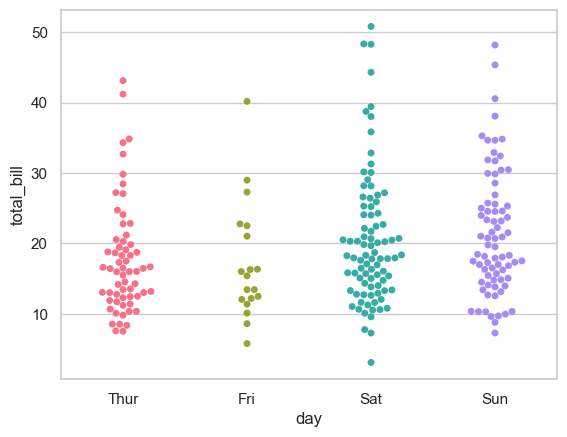

In [31]:
# boxplot과 같이 쓰기
sns.swarmplot(data=tips, x='day', y='total_bill', palette='husl')

### lmplot()
- 스캐터 그래프를 그릴때 회귀선을 기본으로 출력해주는 그래프 함수
- 옵션
    - x, y, data, palette  
    - height  : 그래프 크기
        - size 사용시 오류 발생 : height로 변경해서 사용  
    - hue  : 카테고리 데이터를 분류하여 그룹화하되 하나의 그래프에 두개의 값을 모두 표현
        - hue='sex' : 하나의 그래프에 male, female 표시
    - col  : 카테고리 데이터를 분류하여 그룹화하되 그룹의 개수만큼 그래프를 생성해서 표현
        - col='sex' : 2개의 그래프로 분리. male 그래프, female 그래프
    - fit_reg=False : 회귀선 생략 가능
    - ci = None : 신뢰구간 없음 (95:95% 신뢰구간)
    - scatter_kws = {'s':50, 'alpha':1} : 점의 크기 및 투명도

### 참고
회귀 분석
- 하나 또는 그 이상의 독립변수와 종속변수에 대한 영향을 추정할 수 있는 통계 기법  
- 두 변수의 상관관계를 기본으로 하여  
- 하나의 1차 선형식으로 두 변수의 관계를 일반화하는 분석 방법  

예:    
    - 독립변수가 종속변수에 영항을 미치는가?   
    - 독립변수가 1증가할 때 종속변수는 얼마나 증가할 것인가?  

회귀선에서 가장 유용한 값은 기울기  
- 기울기 : 종속변수에 독립변수가 미치는 영향을 나타낸다  
- 기울기 클수록 종속변수에 미치는 영향, 관계의 정도가 커진다는 의미  
- 기울기 음(-)이라면 변화의 방향이 반대로 독립변수가 증가할 수록 종속변수는 감소하는 관계  

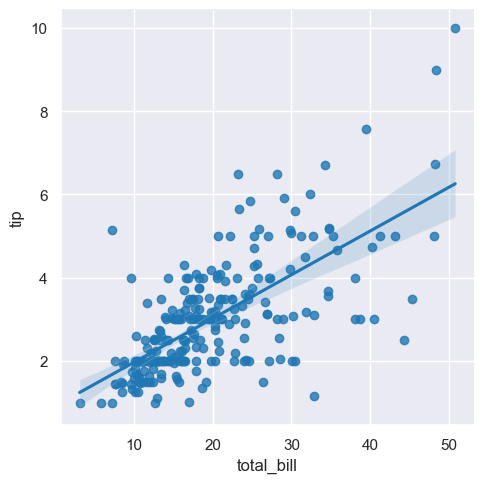

In [32]:
sns.set_style('darkgrid')

# 지불액에 따른 팁의 변화가 어떠한가?
sns.lmplot(data=tips, x='total_bill', y='tip')
plt.show()

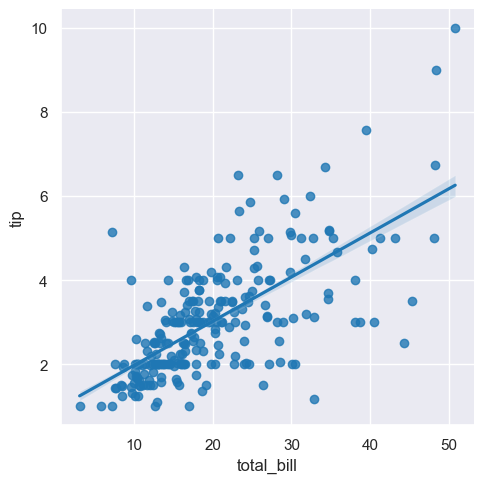

In [33]:
# ci : 비례관계의 신뢰도 설정
sns.lmplot(data=tips, x='total_bill', y='tip', ci=50)
plt.show()

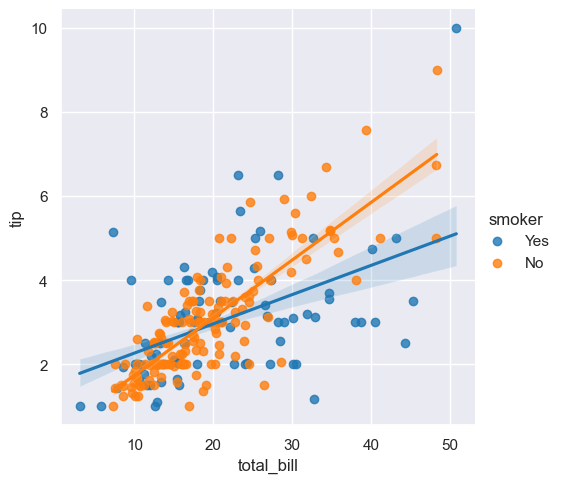

In [34]:
# hue : 여러개 동시에
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', ci=70)
plt.show()

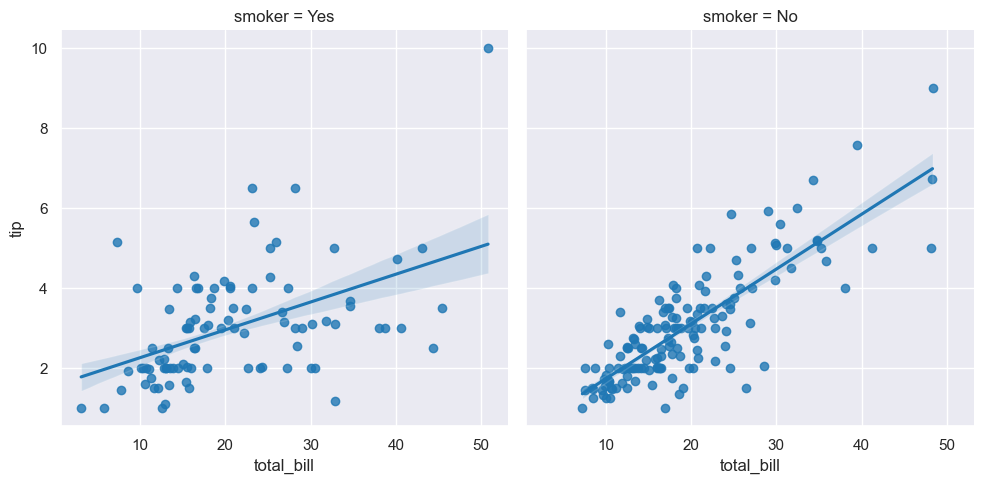

In [35]:
# hue말고 row, col을 쓰면 그래프를 따로 볼 수 있다
sns.lmplot(data=tips, x='total_bill', y='tip', col='smoker', ci=70)
plt.show()

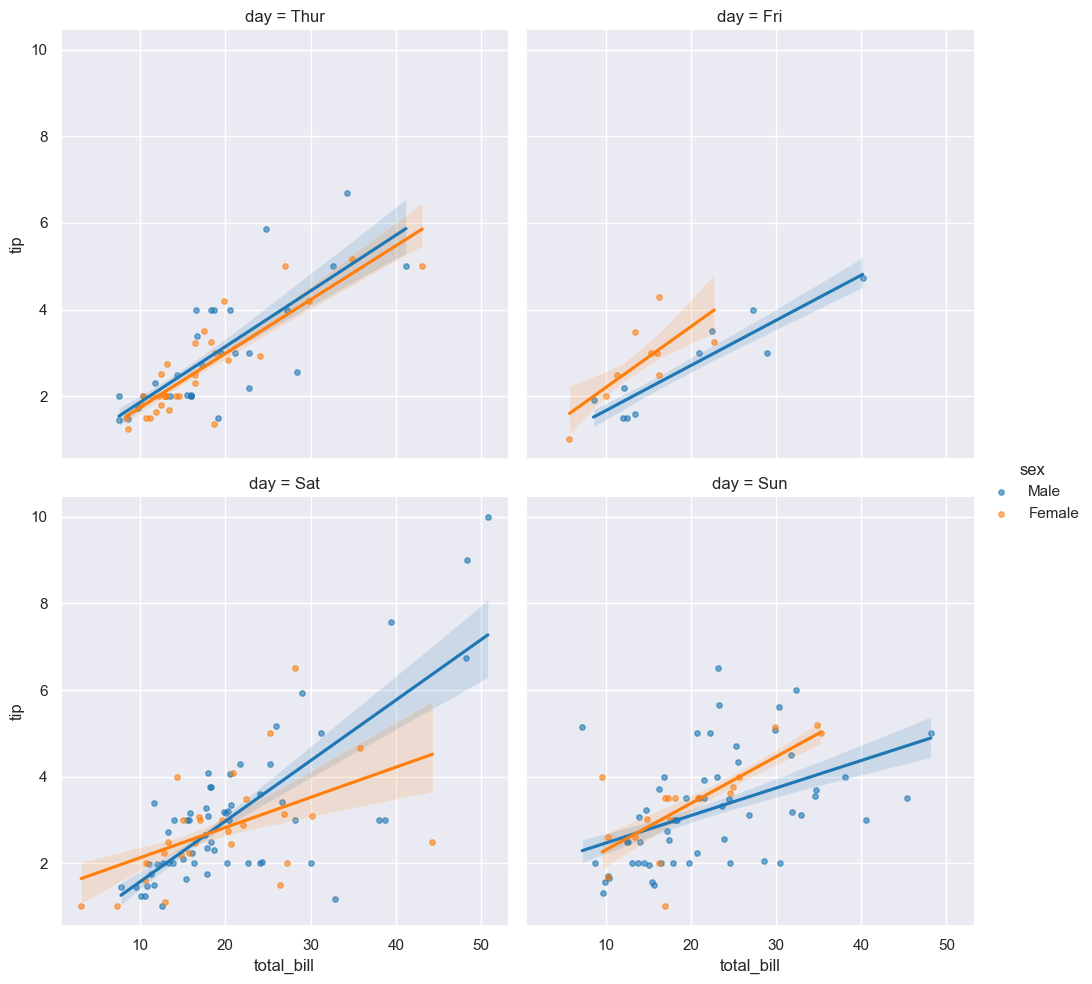

In [36]:
# 종합
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', col='day', col_wrap=2, ci=70,
          scatter_kws={'s':15, 'alpha':0.6})
# col_wrap : 열이 너무 많으면 아래로 보냄
# scatter_kws : 점들의 디자인 조정 / s : 점의 크기, alpha : 점의 투명도
plt.show()

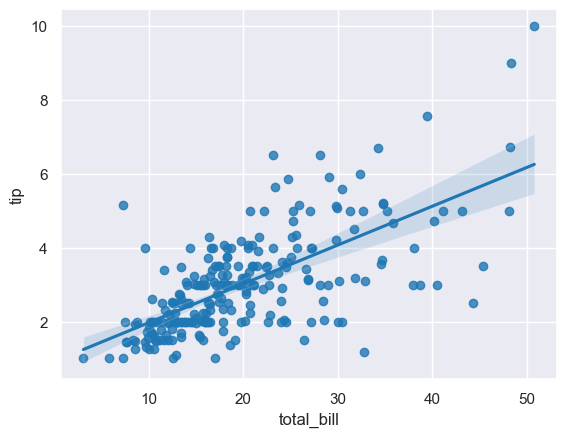

In [37]:
# 자매품 / 근데 옵션 잘못 넣으면 오류남
sns.regplot(data=tips, x='total_bill', y='tip')
plt.show()

### heatmap 그래프
- 히트맵 (heat map)
    - 열분포도
    - 2차원 수치 데이터를 색으로 표시
        - 집계한 값에 비례해서 색상을 다르게 하여 2차원으로 데이터를 시각화하는 방법
    - 두개의 카테고리 값에 대한 값 변화를 한 눈에 알기 쉬움
    - 대용량 데이터 시각화에도 많이 사용됨

sns.heatmap()  
- annot = True :  숫자 표시 여부 <br>
- ax = ax :  히트맵을 그릴 격자 <br>
- linewidths = 0.4, : 선의 굵기 <br>
- linecolor = 'white' : 선의 색깔 <br>
- fmt = '.1f' :  소수점 포맷팅 형태 <br>
- cmap = 'YlOrRd' :  colormap 형태

In [38]:
# heamap()에 사용할 데이터셋 : 항공기 승객수 데이터셋 사용
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [39]:
# flights.to_csv('flights.csv')

In [40]:
flights_pv = flights.pivot_table(index='year', columns='month', values='passengers', aggfunc='sum')
flights_pv

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


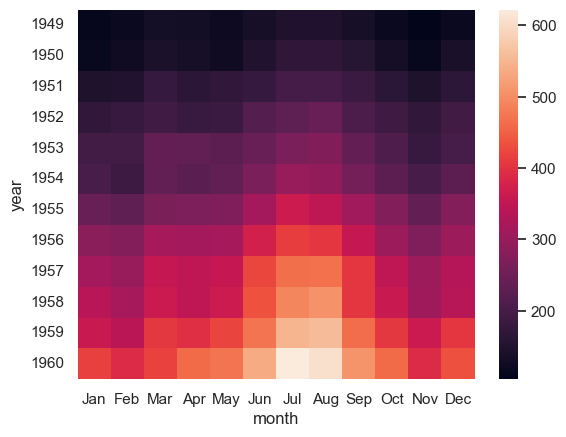

In [41]:
sns.heatmap(flights_pv)
plt.show()

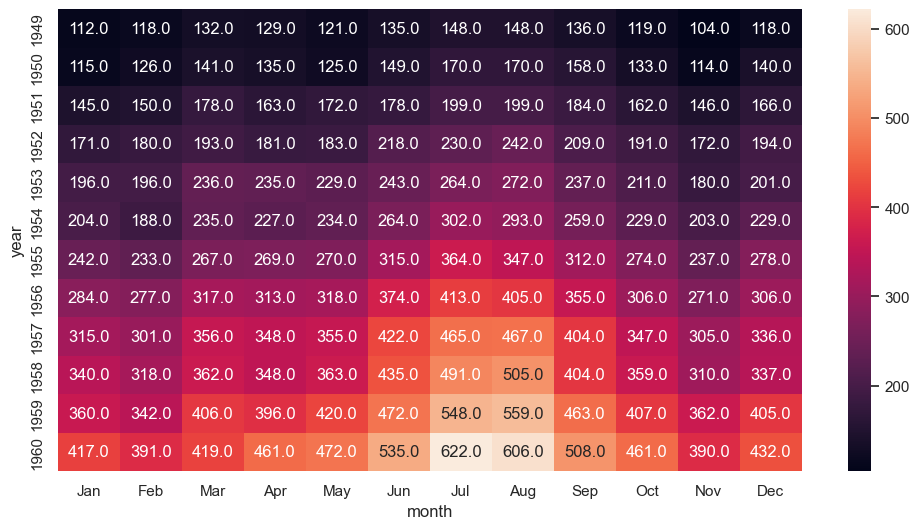

In [42]:
plt.figure(figsize=(12, 6))
sns.heatmap(flights_pv, annot=True, fmt='.1f')
# annot : 숫자 표시, fmt = 숫자 포맷
plt.show()

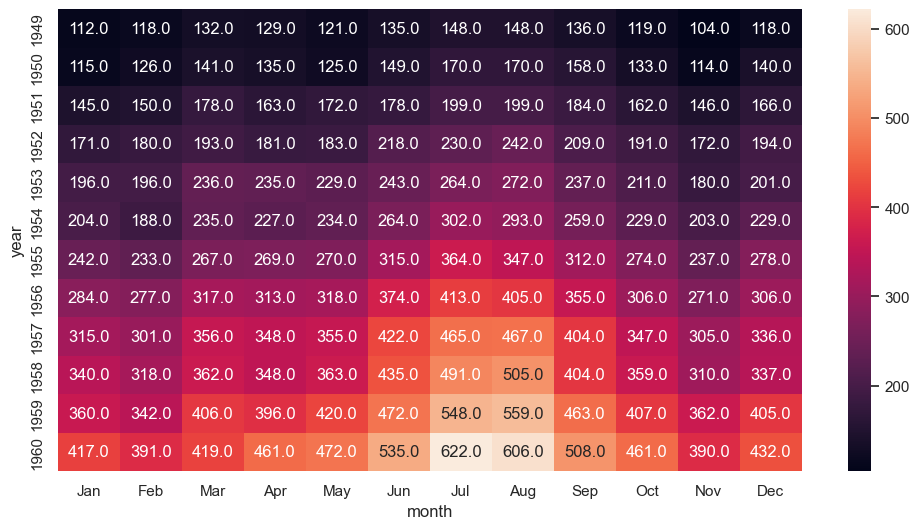

In [43]:
plt.figure(figsize=(12, 6))
sns.heatmap(flights_pv, annot=True, fmt='.1f')
# annot : 숫자 표시, fmt = 숫자 포맷
plt.show()

### 상관 행렬을 통한 heatmap 활용 : 상관관계 시각화
- df.corr() 사용하여 상관 행렬 구한 후
- heatmap()으로 상관관계 시각화

In [44]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [45]:
# 상관계수 구해서 출력 : corr() 사용
# 상관계수 구하는 corr()에서 문자값  포함되면 오류 
# 수치값이 아닌 값을  포함하는 열이 있으면 오류 
# tips에는 카테고리 타입 열 포함되어 있으므로
# 카테고리 타입의 열 제외하고 상관계수 구하기

cgs_cols = tips.select_dtypes(include=['category']).columns 
new_tips = tips.drop(columns=cgs_cols)
new_tips
# 수치값 열만 포함하는 df 생성

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [46]:
# correlation
new_tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

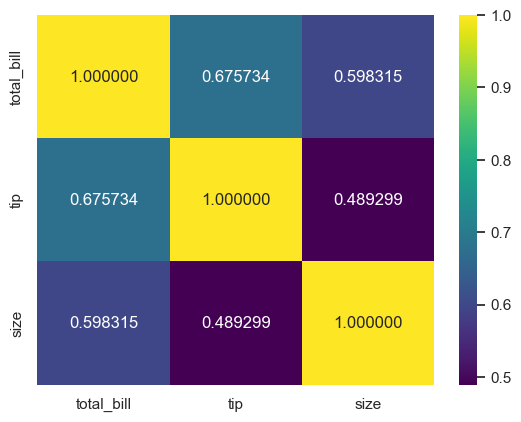

In [47]:
sns.heatmap(new_tips.corr(), annot=True, fmt='f', cmap='viridis')

#### pairplot()
- 데이터 셋 전체를 입력으로 넣어서 수치형 변수들끼리 상관 매트릭스를 표현
- 각 그리드의 두 변수 간의 관계를 나타내는 그래프 표시  
- 그리드 형태로 각 데이터의 열의 조합에 대해 스케터 플롯을 그린다
- 3차원 이상의 데이터에 적용
- 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다
- 대각선 위와 아래는 축만 바꾼것이므로 한쪽만 확인하면 됨
- 선형적인 관계로 보이는 그래프 확인  

In [48]:
# 아이리스 꽃 (붓꽃) 데이터 사용
# 꽃잎 (petal), 꽃받침(sepal)의 너비와 폭으로 종 구분
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
sns.set_style('whitegrid')

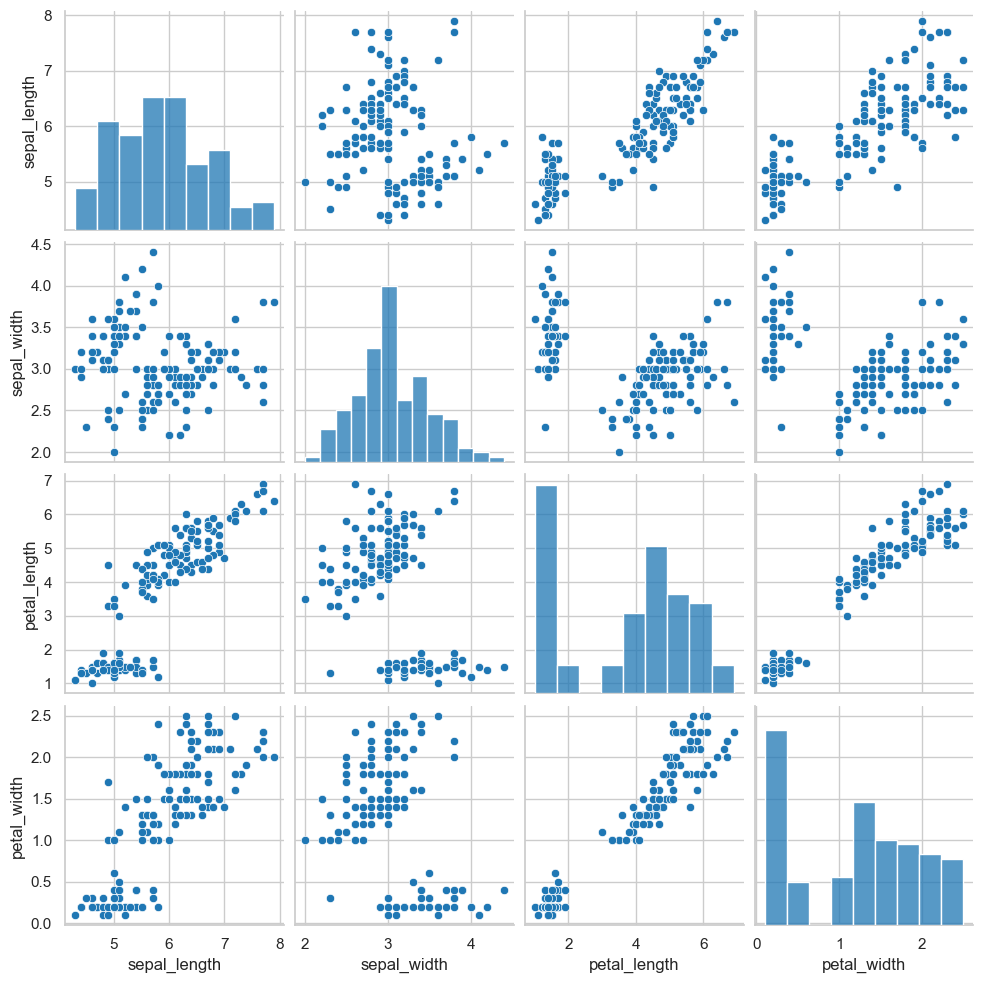

In [50]:
sns.pairplot(iris)
plt.show()

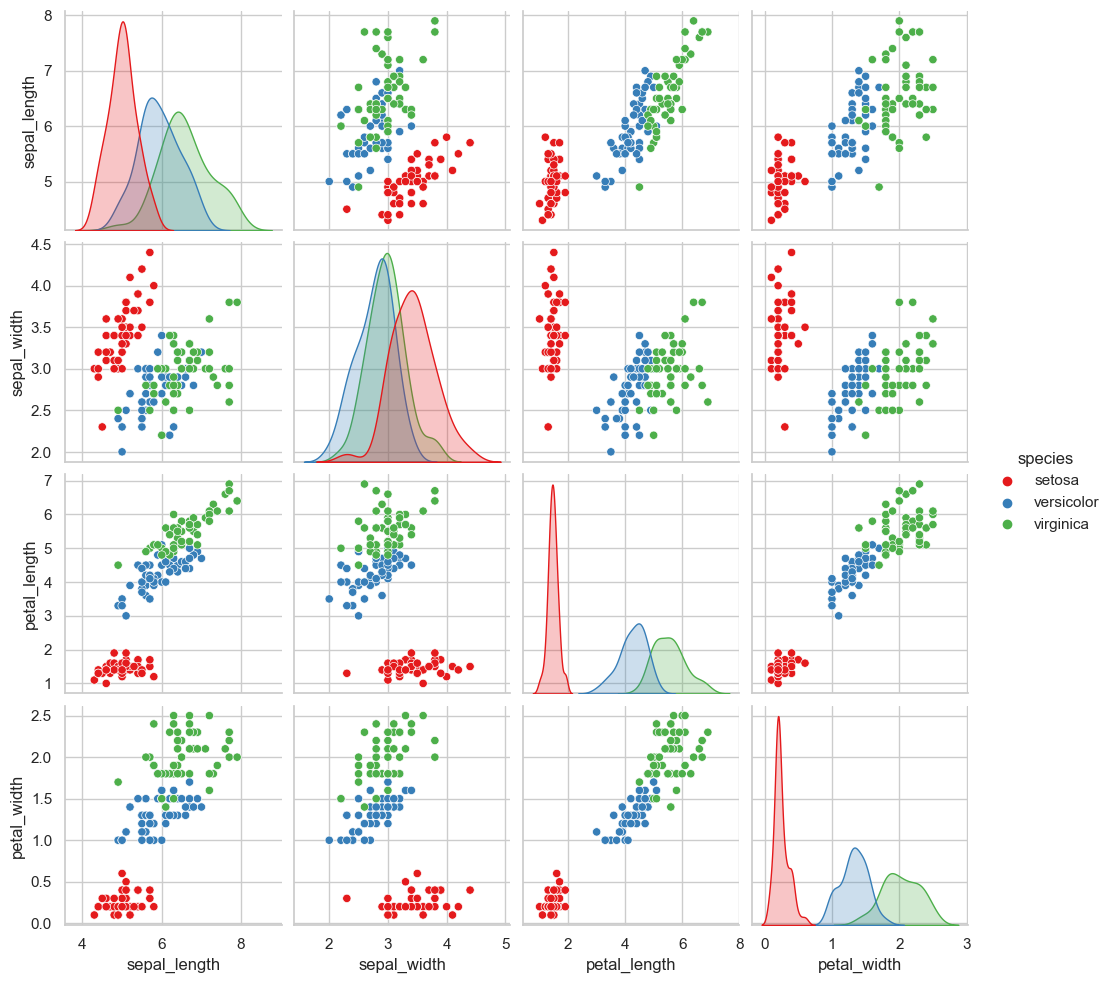

In [51]:
sns.pairplot(iris, hue='species', palette='Set1')
plt.show()

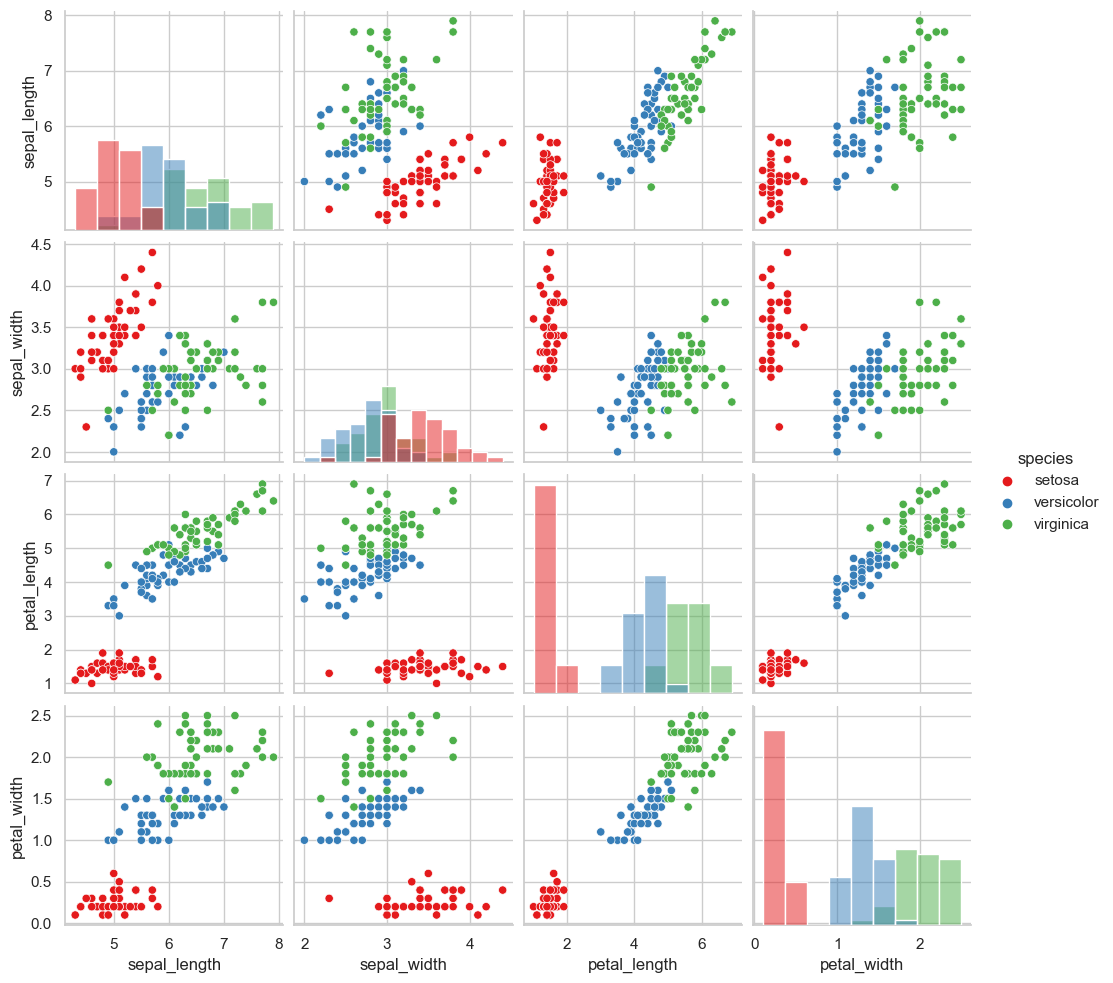

In [52]:
sns.pairplot(iris, hue='species', diag_kind='hist', palette='Set1') # kde를 hist로 바꾼다
plt.show()

# folium  패키지
- 지도 이용해 data 시각화 하는 도구 
- 아나콘다 프롬프트에서 설치
    - pip install folium : 주로 사용
    - pip install Folium
- OPEN STREET MAP과 같은 지도 데이터에 leaflet.js 를 이용해서 위치 정보를 시각화 하기 위한 라이브러리
- 마커형태로 위치정보를 지도상에 표현할 수 있다

In [53]:
import folium

In [54]:
print(folium.__version__)

0.14.0


#### 지도 생성 방법
- Map() 메소드에 중점 좌표값을 지정해서 간단하게 지도 생성
- 위도와 경도로 위치로 지도 그려줌 

- 중심좌표 인수 : location=[위도, 경도]  
    - 위도(latitude)와 경도(longitude) 
- 확대비율 정의 인수 : zoon_start=13  

---
- Open Street  Map을 기반으로 동작하고
- 내부적으로 스타일 2개를 지원
     - tiles= Stamen Toner/ Stamen Terrain

In [55]:
# Open Street Map 기반 지도
# 맨해튼 : 위도 40.6643, 경도 -73.9385
smap = folium.Map(location=[40.6643, -73.9385], zoom_start=12)
smap

In [56]:
smap = folium.Map(location=[40.6643, -73.9385], zoom_start=12)
folium.TileLayer('CartoDB positron').add_to(smap)
smap

In [57]:
# 서울 시청 위도 : 37.5665, 경도 : 126.9783
seoul_city = folium.Map(location=[37.5665, 126.9783], zoom_start=17)
seoul_city

#### 마커 및 popup 설정
    - 마커(특정 위치를 표시하는 표식)
    - popup(마커 클릭시에 나타나는 정보) : 환경에 따라 지원안되는 경우도 있음

1. 마커 생성
    - folium.Marker(): 위,경도 값 리스트, popup, icon 설정
    - 서클 마커 : CircleMarker() : 위,경도 값 리스트, popup, radius, color, fill_color
2. 마커 생성 후 지도에 부착
    - folium.Marker().add_to(지도객체변수)
    - folium.CircleMarker().add_to(지도객체변수)

In [58]:
# 덕수궁 위도 : 37.5658, 경도 : 126.9751
seoul_city = folium.Map(location=[37.5666, 126.9783], zoom_start=17)
folium.Marker([37.5667, 126.9784], popup='시청').add_to(seoul_city)
folium.CircleMarker([37.5662, 126.9751], popup='덕수궁', radius=50, color='red', fill_color='blue').add_to(seoul_city)
seoul_city

# 단계 구분도
- 데이터를 지도 그림에 반영시켜서 전달하는 그래프
- 보통 folium 에 layer로 올려서 표시
- map 객체의 choropleth() 이용
- 사용 인수
    - geo_data : 지도 파일 경로와 파일명
    - data : 지도에 표현되어야 할 값 변수
    - columns =  [key로 사용할 data, 실제 data의 필드명]
    - key_on : 지도 경계파일인 json에서 사용할 키 값이며 지도 Data는 표준 형식으로 만들어 져야 함
        - key_on 지칭 문법 : feature(키워드).json에서 나타나키 필드명
- folium.LayerControl().add_to(map)  : 단계구분도를 map에 표시하는 함수

In [59]:
# 단계 구분도에서 사용할 data : population.csv 파일에서 읽어 오기
# 구별 CCTV 인구수
pop_df = pd.read_csv('data/population.csv', index_col='구별')
pop_df 

,소계
구별,
종로구,150.619195
중 구,166.490765
용산구,125.203252
성동구,134.793814
광진구,2109.000000
동대문구,53.228621
중랑구,64.973730
성북구,100.000000
강북구,188.929889


In [60]:
import json
geo_path = '../data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [61]:
seoul = folium.Map(location=[37.5502, 126.982], zoom_start=11)

seoul.choropleth(geo_data=geo_str, data=pop_df, columns=[pop_df.index, '소계'],
                key_on='feature.id', fill_color='PuRd', legend_name='CCTV 소계')

folium.LayerControl().add_to(seoul)

seoul

In [62]:
seoul.save('seoul_map_with_cctv.html') # 저장